# Test 6.0


## Theory Question


Question 1: What is Transfer Learning and why is it important?

Question 2: Define Auxiliary Branches, Naive Inception Module, and Dimension Reduction with mathematics.

Question 3: Define Reduction Block and specify which architecture it uses.







Answer 1
- Transfer learning is a deep learning method where pre-trained models are used for computer vision tasks.
- It is important because the pre- trained models are already trained on large dataset/corpus. So if the task for which we need build model is related to the dataset to which the model is already pre-trained. It will reduce the time resource required to train model from scratch.
- Using pre-trained models gives better performance/accuracy of the model as kernels, weights and bias are already trained on the bigger dataset.

Answer 2:
- Auxillary Branches are branches seperated from the model to caculate the loss and decide if modules added are worth it or not.

-  Naive Inception module is a module which tackles the problem of  varying image object size and overfitting issues in vgg and alexnet. Goal is to make it wider rather than deeper we used 3 convulution filters to extract image features 1x1, 3x3,5x5 and after applying maxpooling it is then finally concatenated.

- Dimension reduction is a technique used in inceptionet to reduce the dimension by using 1x1 convulution which will help in reducing trainable parameters. Instead of using 5x5 or 3x3 directly we will use 1x1 first then followed by 3x3/5x5. 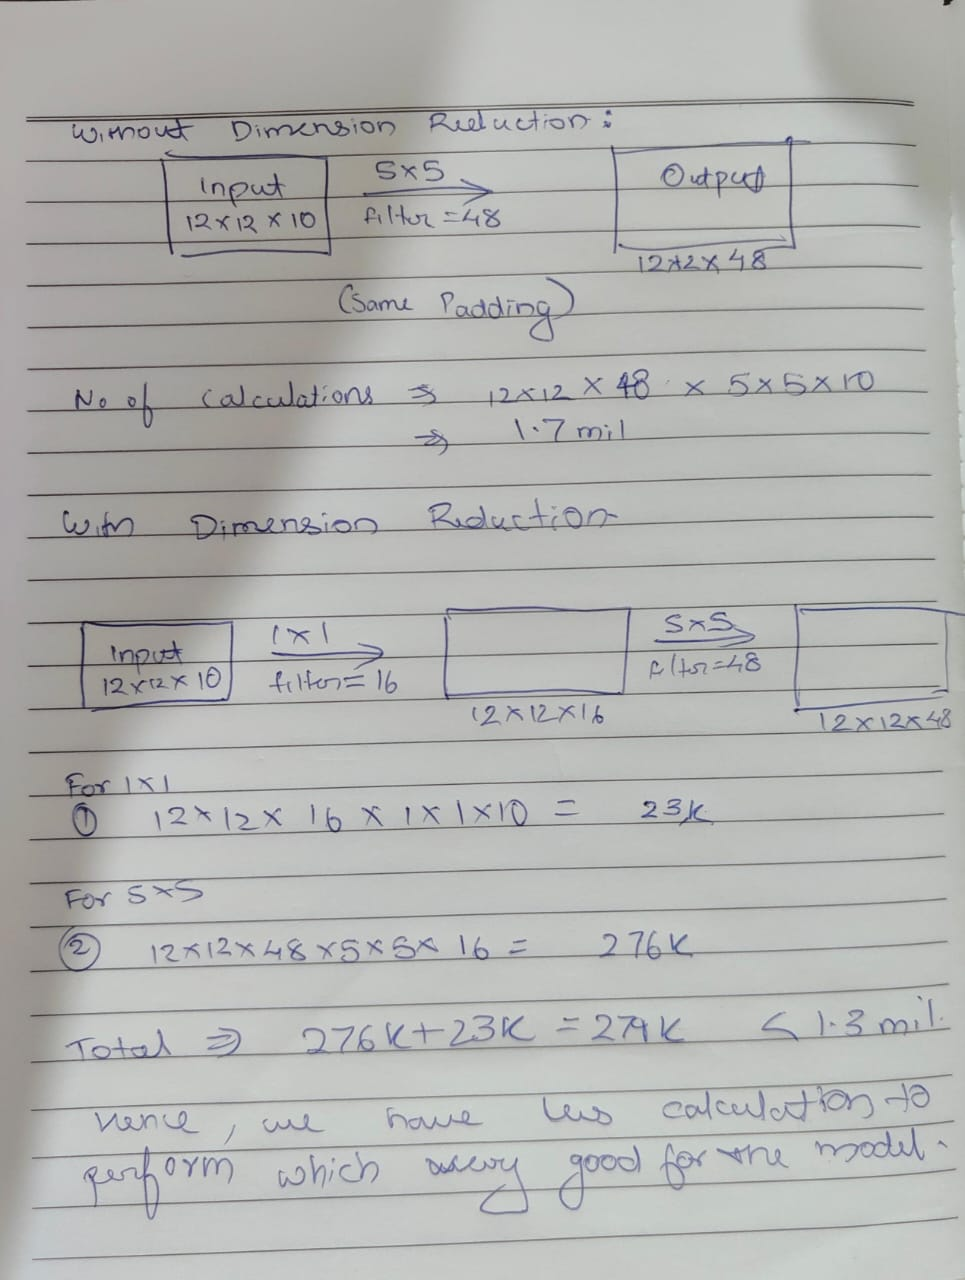

Asnwer 3:

- Reduction block is used in Inception V4 model architechture.
- These are block which are added to reduce the sizes before going for pooling.
- There are 2 blocks Reduction block A and Reduction block B
- Block A reduces Input size of 35 x 35 to 17 x 17
- Block B reduces input size of 17 x17 to 8 x 8


# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters with 3 X 3 X 3 kernal filters only on each layer )
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [1]:
!pip install kaggle

In [2]:
mkdir ~/.kaggle

In [3]:
 cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 218M/218M [00:11<00:00, 22.8MB/s]
100% 218M/218M [00:11<00:00, 19.7MB/s]


In [6]:
!unzip /content/cat-and-dog.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/data/training_set/training_set/cats/cat.3715.jpg  
 

In [17]:
import tensorflow as tf
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import utils
import matplotlib.pyplot as plt


In [8]:
base_dir  = '/content/data/'
train_dir = base_dir+'training_set/training_set'
test_dir =  base_dir+'test_set/test_set'

In [9]:
img_size=227
btch_size=128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=btch_size,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=btch_size,
    subset='validation'
)

Found 7205 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [ ]:
del model

In [11]:
# Alexnet architecture 2 sets of Conv2d and maxpool followed by 3 conv2d then flatten and finally MLP layers till softmax(Condition given 3x3x32filter )
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(227, 227, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3,3)))
model.add(Conv2D(32, (3,3)))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax', name='Output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 32)        9

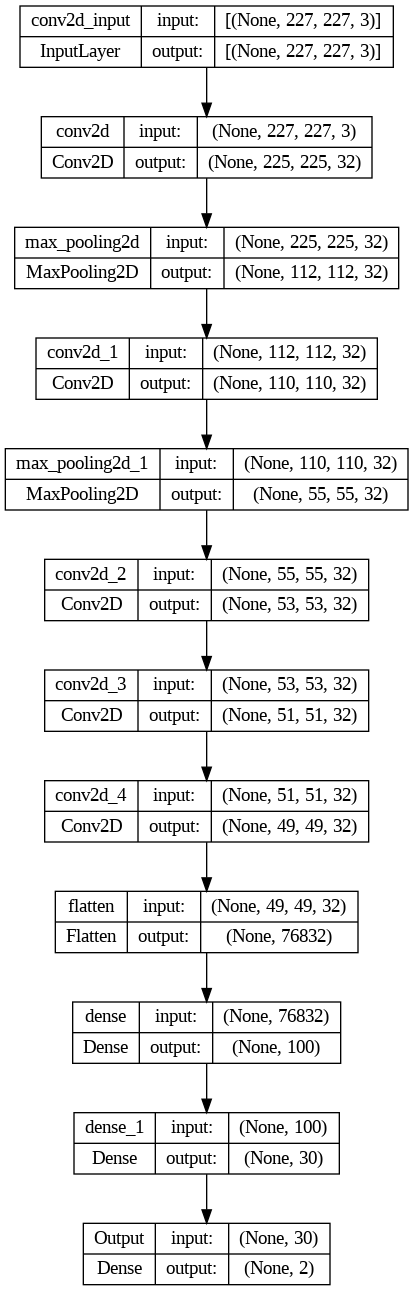

In [12]:
utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epoch = 10
history = model.fit(train_generator,  steps_per_epoch=len(train_generator),epochs=epoch,  validation_data=validation_generator, validation_steps=len(validation_generator))

Epoch 1/10
57/57 [==============================] - 120s 2s/step - loss: 2.6445 - accuracy: 0.5346 - val_loss: 0.7399 - val_accuracy: 0.5545
Epoch 2/10
57/57 [==============================] - 96s 2s/step - loss: 0.6760 - accuracy: 0.5994 - val_loss: 0.6431 - val_accuracy: 0.6337
Epoch 3/10
57/57 [==============================] - 99s 2s/step - loss: 0.6335 - accuracy: 0.6382 - val_loss: 0.6300 - val_accuracy: 0.6287
Epoch 4/10
57/57 [==============================] - 94s 2s/step - loss: 0.6159 - accuracy: 0.6577 - val_loss: 0.6322 - val_accuracy: 0.6436
Epoch 5/10
57/57 [==============================] - 96s 2s/step - loss: 0.6025 - accuracy: 0.6712 - val_loss: 0.6202 - val_accuracy: 0.6535
Epoch 6/10
57/57 [==============================] - 93s 2s/step - loss: 0.5920 - accuracy: 0.6837 - val_loss: 0.5541 - val_accuracy: 0.7376
Epoch 7/10
57/57 [==============================] - 97s 2s/step - loss: 0.5635 - accuracy: 0.7137 - val_loss: 0.5332 - val_accuracy: 0.7475
Epoch 8/10
57/57 [=

In [15]:
model.save('alexnet_model.h7')

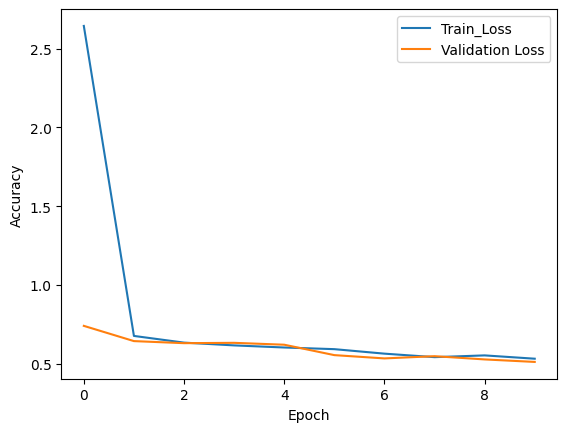

In [21]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [23]:
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=1,
)

Found 2023 images belonging to 2 classes.


In [24]:
rslt= model.predict(test_generator)

print(rslt)


2023/2023 [==============================] - 7s 3ms/step
[[0.9009877  0.09901234]
 [0.9437684  0.05623156]
 [0.99028987 0.00971016]
 ...
 [0.60329264 0.39670733]
 [0.90481436 0.09518567]
 [0.6839959  0.31600407]]


In [26]:
rslt.shape

(2023, 2)

In [1]:
for i in rslt:
  plt.imshow(test_generator)
  plt.show()
  if i[0]>i[1]:
    prediction="cat"
  else:
    prediction="dog"
  print(prediction)
  break

NameError: name 'rslt' is not defined